# Unsupervised Learning Technique (Anomaly detection)

This notebook show how Unsupervised Machine Learning techniques can be used to predict the Loan defaulters

Algorithms used:<br>

k-nearest neighbors <br>
Isolation Forest<br>
Local Outlier Factor<br>
Clustering-Based Local Outlier Factor<br>
Principal Component Analysis <br>
Histogram-based Outlier Score<br>

### Load the data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
application_train = pd.read_csv('cleandata.csv')

## Modeling

### Partitioning

In [3]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = application_train[application_train['TARGET']==1]

Valid = application_train[application_train['TARGET']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print('outlier_fraction for the whole dataset:')
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

outlier_fraction for the whole dataset:
0.08781828601345662
Fraud Cases : 24825
Valid Cases : 282686


In [4]:
from sklearn.model_selection import train_test_split

#Create independent and Dependent Features
columns = application_train.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["TARGET"]]
# Store the variable we are predicting 
target = "TARGET"
# Define a random state 
state = np.random.RandomState(42)
X = application_train[columns]
y = application_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(246008, 210) (246008,)
(61503, 210) (61503,)


In [5]:
X_train.shape

(246008, 210)

### More Feature Selection

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [7]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=state))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x23108B30D08))

In [8]:
sel.get_support()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
selected_feat= X_train.columns[(sel.get_support())].tolist()
len(selected_feat)

41

In [10]:
print(selected_feat)

['FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_FAMILY_STATUS_Married', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']


In [11]:
selected_feat = ['FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Laborers', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

In [12]:
app_X_train = X_train.copy() #Taking a copy before dropping 
app_X_test = X_test.copy()

In [13]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [14]:
print (X_train.shape, X_test.shape)

(246008, 42) (61503, 42)


------------------------------

## PyOD

In [15]:
#!pip install --upgrade pyod

### KNN

In [16]:
from pyod.models.knn import KNN  

In [17]:
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [18]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [19]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)



On Training Data:
KNN ROC:0.4786, precision @ rank n:0.0651

On Test Data:
KNN ROC:0.4879, precision @ rank n:0.0602


Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Higher => More Anomalous')

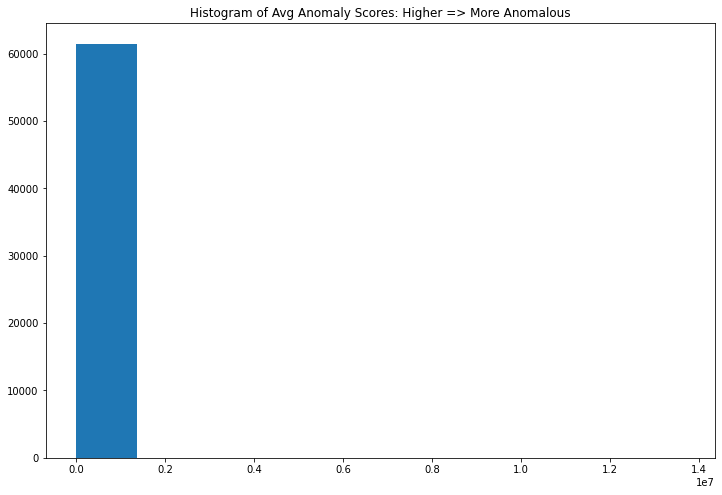

In [20]:
plt.figure(figsize=(12,8))

#bins = np.linspace(0.0, 0.05)
plt.hist(y_test_scores)

plt.title('Histogram of Avg Anomaly Scores: Higher => More Anomalous')

In [21]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("KNN errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

KNN errors: 10317
Accuracy Score :
0.8322520852641334
Confusion matrix :
[[50795  5757]
 [ 4560   391]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56552
           1       0.06      0.08      0.07      4951

    accuracy                           0.83     61503
   macro avg       0.49      0.49      0.49     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.48858691574373264


### iForest

In [22]:
from __future__ import division
from __future__ import print_function

In [23]:
from pyod.models.iforest import IForest

In [24]:
clf_name = 'IForest'
clf = IForest(random_state=state)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)



On Training Data:
IForest ROC:0.4717, precision @ rank n:0.0564

On Test Data:
IForest ROC:0.4742, precision @ rank n:0.0616


Text(0.5, 1.0, 'Histogram')

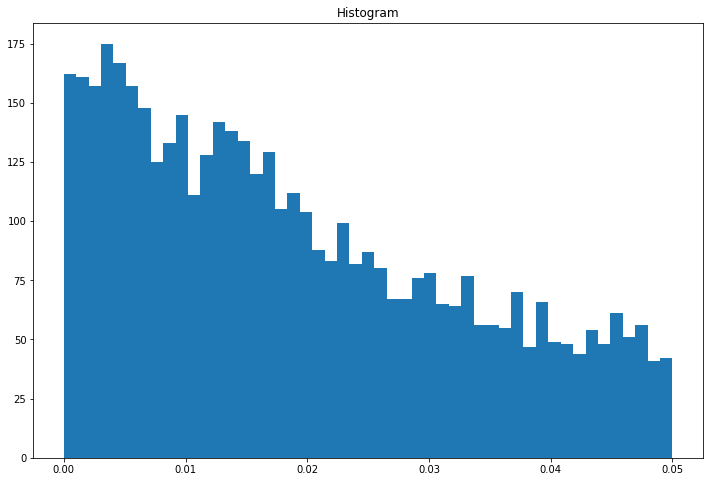

In [25]:
plt.figure(figsize=(12,8))

bins = np.linspace(0.0, 0.05)
plt.hist(y_test_scores, bins)

plt.title('Histogram')

In [26]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Isolation Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Isolation Forest errors: 10330
Accuracy Score :
0.832040713461132
Confusion matrix :
[[50774  5778]
 [ 4552   399]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56552
           1       0.06      0.08      0.07      4951

    accuracy                           0.83     61503
   macro avg       0.49      0.49      0.49     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.4892091635101373


### Local Outlier Factor

In [27]:
from pyod.models.lof import LOF

In [28]:
clf_name = 'LOF'
clf = LOF()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
LOF ROC:0.4895, precision @ rank n:0.075

On Test Data:
LOF ROC:0.4866, precision @ rank n:0.0735


Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Higher => More Anomalous')

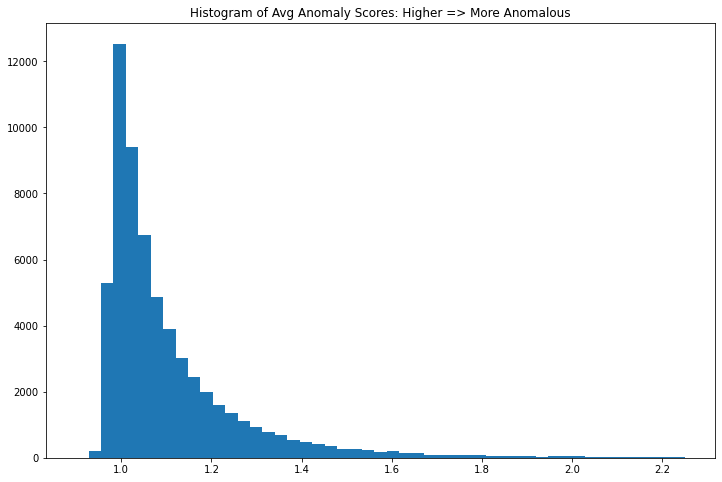

In [29]:
plt.figure(figsize=(12,8))

bins = np.linspace(0.9, 2.25)
plt.hist(y_test_scores, bins)

plt.title('Histogram of Avg Anomaly Scores: Higher => More Anomalous')

In [30]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Local Outlier Factor errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Local Outlier Factor errors: 10433
Accuracy Score :
0.8303659984065818
Confusion matrix :
[[50600  5952]
 [ 4481   470]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     56552
           1       0.07      0.09      0.08      4951

    accuracy                           0.83     61503
   macro avg       0.50      0.49      0.49     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.4948410250130155


### Clustering-Based Local Outlier Factor

In [31]:
from pyod.models.cblof import CBLOF

In [32]:
# train CBLOF detector
clf_name = 'CBLOF'
clf = CBLOF(random_state=state)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
CBLOF ROC:0.4739, precision @ rank n:0.0544

On Test Data:
CBLOF ROC:0.4845, precision @ rank n:0.0602


Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Higher => More Anomalous')

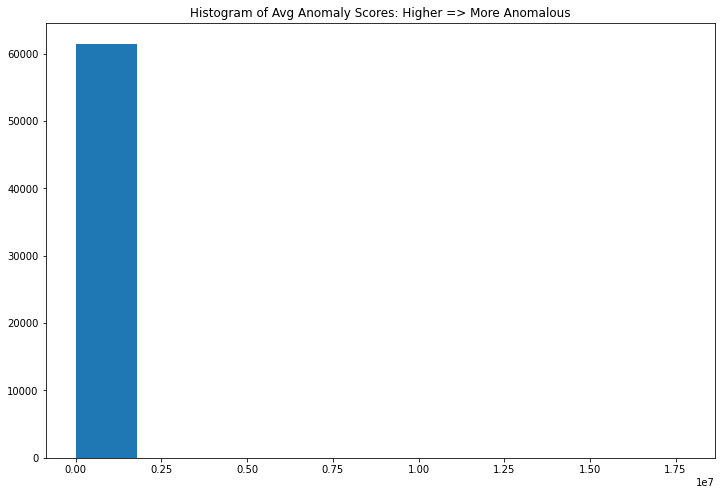

In [33]:
plt.figure(figsize=(12,8))

#bins = np.linspace(0.0, 1.25)
plt.hist(y_test_scores)

plt.title('Histogram of Avg Anomaly Scores: Higher => More Anomalous')

In [34]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Clustering-Based Local Outlier Factor errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Clustering-Based Local Outlier Factor errors: 10428
Accuracy Score :
0.83044729525389
Confusion matrix :
[[50700  5852]
 [ 4576   375]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56552
           1       0.06      0.08      0.07      4951

    accuracy                           0.83     61503
   macro avg       0.49      0.49      0.49     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.48613114563177484


### Principal component analysis

In [35]:
from pyod.models.pca import PCA

In [36]:
clf_name = 'PCA'
clf = PCA(n_components=2,random_state=state)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
PCA ROC:0.4953, precision @ rank n:0.0632

On Test Data:
PCA ROC:0.4949, precision @ rank n:0.0669


Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Higher => More Anomalous')

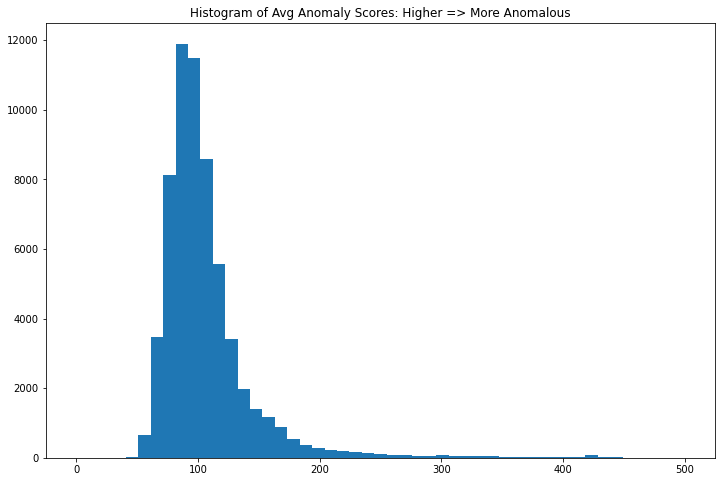

In [37]:
plt.figure(figsize=(12,8))

bins = np.linspace(0,500)
plt.hist(y_test_scores,bins)

plt.title('Histogram of Avg Anomaly Scores: Higher => More Anomalous')

In [38]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Principal component analysis errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Principal component analysis errors: 10306
Accuracy Score :
0.8324309383282116
Confusion matrix :
[[50787  5765]
 [ 4541   410]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56552
           1       0.07      0.08      0.07      4951

    accuracy                           0.83     61503
   macro avg       0.49      0.49      0.49     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.49043498866340984


### Histogram-based Outlier Score

In [39]:
from pyod.models.hbos import HBOS

In [40]:
clf_name = 'HBOS'
clf = HBOS()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
HBOS ROC:0.4804, precision @ rank n:0.0567

On Test Data:
HBOS ROC:0.4813, precision @ rank n:0.0669


Text(0.5, 1.0, 'Histogram')

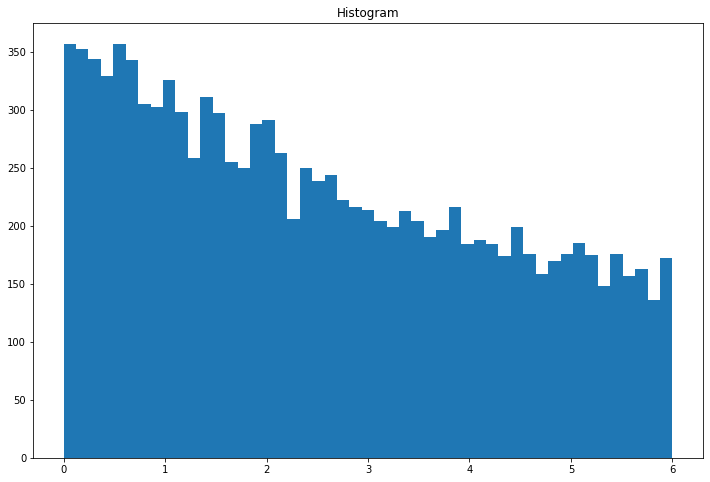

In [41]:
plt.figure(figsize=(12,8))

bins = np.linspace(0, 6)
plt.hist(y_test_scores, bins)

plt.title('Histogram')

In [42]:
n_errors = (y_test_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Histogram-based Outlier Score errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report :")
print(classification_report(y_test,y_test_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_test_pred))

Histogram-based Outlier Score errors: 10301
Accuracy Score :
0.8325122351755199
Confusion matrix :
[[50801  5751]
 [ 4550   401]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56552
           1       0.07      0.08      0.07      4951

    accuracy                           0.83     61503
   macro avg       0.49      0.49      0.49     61503
weighted avg       0.85      0.83      0.84     61503

ROC AUC score is:  0.4896498612559541
